<a href="https://colab.research.google.com/github/SaiSriVidyadhari/SaiSriVidyadhari/blob/main/Industry_Graded_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Marks Allocation**
1. Exploratory data Analysis [18 x 2 Marks]
2. Modeling [16 x 3 Marks]
3. Project report/synopsis with detailed .ipynb(With best Markdown explanation) [16 Marks]

**Exploratory Data Analysis:**

In [ ]:
#importing required libraries
import pandas as pd # data preprocessing, read the csv file
import numpy as np #linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from scipy.stats import stats

In [ ]:
# to read the file & to get the data shape
data=pd.read_csv("/content/train(1).csv")
train=data.copy()
print("data shape",data.shape)

data shape (595212, 59)


In [ ]:
data.head(10)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,1.8,2.332649,10,0,-1,0,0,14,1,1,0,1,104,2,0.445982,0.879049,0.406202,3.000000,0.7,0.8,0.4,3,1,8,2,11,3,8,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.6,0.1,0.617454,6,1,-1,0,1,11,1,1,0,1,99,2,0.316228,0.639683,0.368782,3.162278,0.2,0.6,0.5,2,2,8,1,8,3,10,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,0,0,0,0,0,0,13,1,0,0,0.7,0.4,0.607248,11,1,0,0,0,11,1,1,2,1,30,3,0.446990,0.900574,0.374833,3.316625,0.1,0.5,0.1,1,2,7,1,6,1,13,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,0,0,0,0,0,0,6,1,0,0,0.9,0.7,0.901388,10,1,-1,0,1,14,1,1,0,1,68,3,0.400000,0.780641,0.407431,2.828427,0.9,0.8,0.6,3,1,7,3,9,4,11,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,0,0,0,0,0,0,4,0,0,1,0.9,1.4,2.316652,11,0,0,1,0,14,1,1,2,1,104,2,0.447214,1.458184,0.390256,3.605551,0.7,0.8,0.8,2,2,8,2,9,1,11,3,5,0,6,0,1,0,0,1,0


In [ ]:
data.info() #to get useful information about the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [ ]:
data.describe() #gives summary statistics of columns which are continuous in nature and not categorical.

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829948,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375679,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.00000

In [ ]:
data.columns# to get the titles of the columns present

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


**#1.Write at least 3 important inferences from the data above?**
The given data is highly imbalance.


**2.Is the data balanced? Meaning are targets 0 and 1 in the right proportion?**

Distribution of class 0 & 1: 0    96.355248
1     3.644752
Name: target, dtype: float64


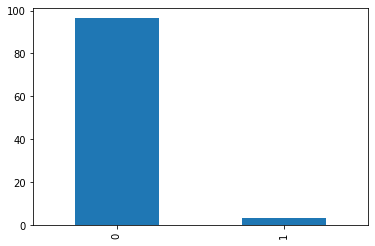

In [ ]:
balan = (data['target'].value_counts()/(data.shape[0]))*100
print("Distribution of class 0 & 1:",balan)
balan.plot.bar();

**Balanced Data**
A balanced dataset is a dataset where each output class (or target class) is represented by the same number of input samples.

The given data is highly imbalanced. The 0 & 1 distribution is not same or approximately equal.

**Confusion Matrix**
A conofusion matrix is also known as the error matrix.
The confusion matrix will allow us by observing the proportions of correct classifications in a simple manner.

In [ ]:
#3.How many categorical features are there?
#4.How many binary features are there?
print("train data dtypes count \n",data.dtypes.value_counts()) # to get the count of dtypes availables

train data dtypes count 
 int64      49
float64    10
dtype: int64


In [ ]:
def var_type(element) :
    """
     assuming the count<15 as categorical & >15 as continuoues 
     """
    if element==0:
        return "Not Known"
    elif element < 20 and element!=0 :
        return "Categorical"
    elif element >= 20 and element!=0 :
        return "Contineous"

In [ ]:
def predict_var_type(data_matrix):
    data_matrix["Variable_Type"] = data_matrix["Unique_Values_Count"].apply(var_type).astype(str)
    data_matrix["frequency"] = data_matrix["Null_Count"] - data_matrix["Null_Count"]
    data_matrix["frequency"].astype(int)
    return data_matrix 
   
def m_data(dataframe) :
   
    data_matrix = pd.DataFrame({
                    'Datatype' : dataframe.dtypes.astype(str), # data types of columns
                    'Non_Null_Count': dataframe.count(axis = 0).astype(int), # total elements in columns
                    'Null_Count': dataframe.isnull().sum().astype(int), # total null values in columns
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100, # percentage of null values
                    'Unique_Values_Count': dataframe.nunique().astype(int) # number of unique values
                     })
    
    data_matrix = predict_var_type(data_matrix)
    return data_matrix
  

In [ ]:
X = data.drop(['id','target'],axis =1)
y=data.target
data_matrix_df = m_data(data)
data_matrix_df["dt_name"] =[ i.split("_")[-1] for i in data_matrix_df.index.values]
data_matrix_df['dt_name'] = data_matrix_df['dt_name'].apply(lambda x : "interval" if str(x).isnumeric() else x)

In [ ]:
Dtype = data_matrix_df.groupby(['dt_name'])

interval_feature =Dtype.get_group("interval").index.tolist()
binary_feature = Dtype.get_group("bin").index.tolist()
categorical_feature = Dtype.get_group("cat").index.tolist()

In [ ]:
group_var_type = data_matrix_df.groupby('Variable_Type')
print("categorical features count:",group_var_type.get_group('Categorical').shape[0])

categorical features count: 50


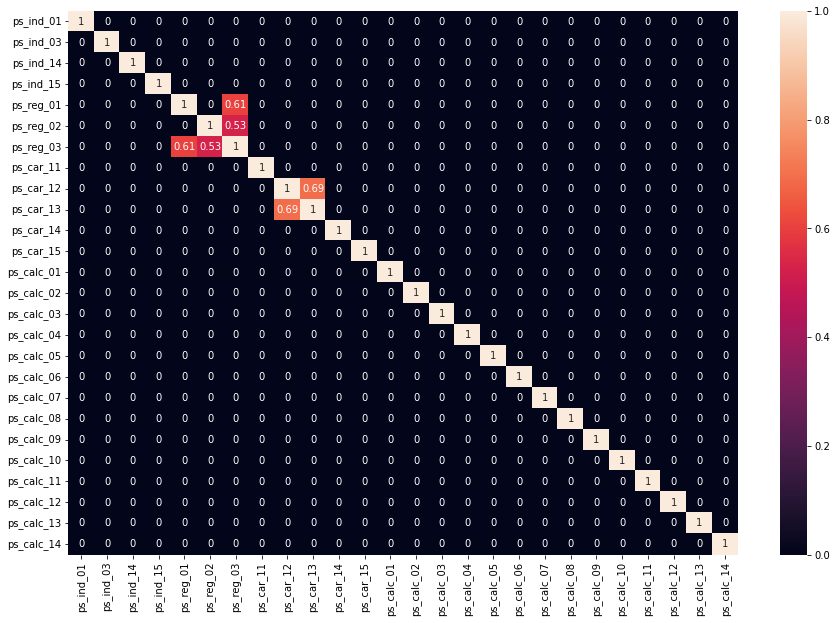

In [ ]:
#5.Write inferences from data on interval variables
"""
An interval scale is one where there is order and difference between two vaues is meaningful.
It is a quantitative data
"""
infe = data[interval_feature].corr()
infe = infe[(infe>=0.5) | (infe<=-0.5)].fillna(0)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(infe,annot= True)
plt.show()

From the above heatmap we can conclude that in all the data is independent except at few places the data.

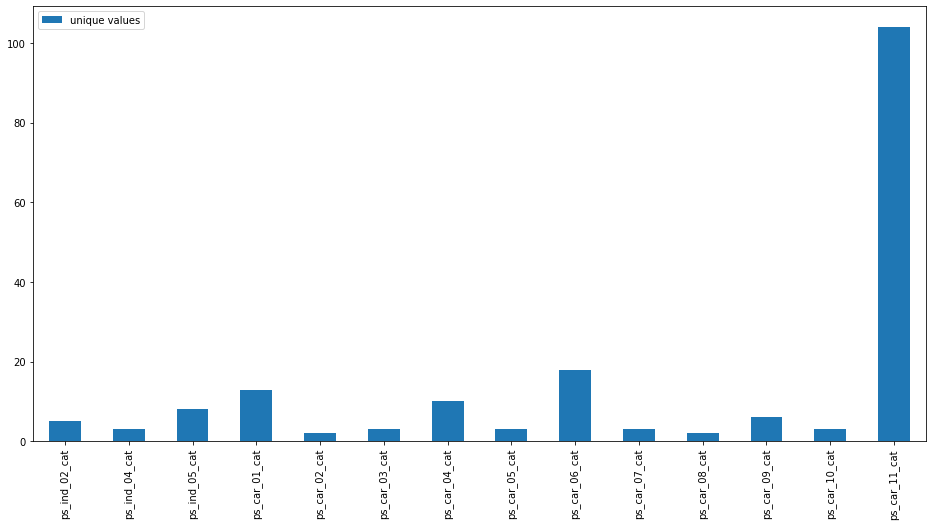

In [ ]:
#6.Write inferences from data on ordinal variables.
"""
An ordinal data is where the order/sequence of the values matters not the difference between the values in the data.
It is a qualitative & categorical data.
"""
ord ={}
for i in data[categorical_feature].columns:
    ord[i] = data[categorical_feature][i].nunique()

pd.DataFrame(ord,index=['unique values']).T.plot.bar(figsize=(16,8));

from the above bar graph we can clearly see that the unique values for all the data is <20 except for one (ps_car_11_cat) featture.

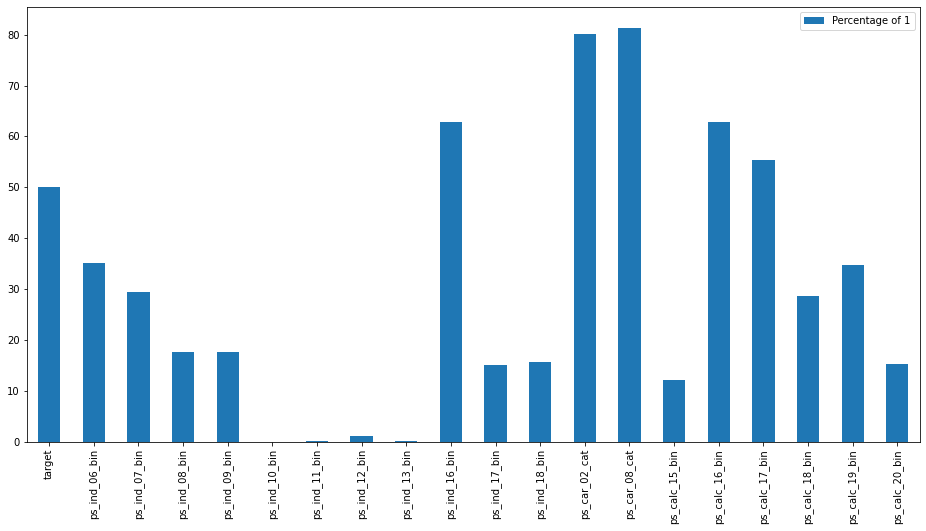

In [ ]:
#7.Write inferences from data on binary variables.
"""
A binary variables is a variable with ony two values (like [0/1], [yes/no], [true/false], [pass/fail], [present/absent].....).
"""
col = data_matrix_df[data_matrix_df['Unique_Values_Count'] == 2].index
df_1 = pd.DataFrame((data[col].sum()/data[col].shape[0])*100, columns=['Percentage of 1'])
df_1.plot.bar(figsize=(16,8));

**f1 score:**
 It is the measaure of accuracy. It is the weighted average of precision & recall (The F1 score is defined as the harmonic mean of precision and recall). 
the f1 score is between 0 & 1. If f1 score is 0=worst & 1= best model.
f1=(2TP)/(2TP+FP+FN)

**Precision:** 
The +ve predicted values(no. of +ve class predicted that actually belon to a +ve class).
it is a quality measure. 
Precision=TP/(TP+FP)

**Recall:**
It is aso known as True Positive Rate(TPR)/ RECALL/ SENSTIVITY
It represent the sensitivity(no. of +ve predicted class to all the observations in actual class. 
It is the quantity measure. 
Recall=TP/(TP+FN)

**Accuracy:** 
It is the measures the number of predictions that are correct as a percentage of the total number of predictions that are made. 
Accuracy=(TP+TN)/(TP+FN+FP+TN)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE
#SMOTE-Synthetic Minority Oversamplin Technique

**#8. Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance**

% of Target=1: (573518, 59) 50.0 
% of Target=0 : (573518, 59) 50.0

 #Imbalanced data


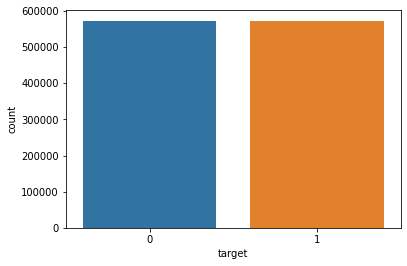

In [ ]:

Pref1= np.round((data[data['target']==1].shape[0]*100)/ data.shape[0],2)
Pref0= np.round((data[data['target']==0].shape[0]*100)/ data.shape[0],2)

print('% of Target=1:',data[data['target']==1].shape, Pref1,'\n% of Target=0 :',data[data['target']==0].shape,Pref0)
print("\n #Imbalanced data")
sns.countplot(x= data['target'])
plt.show()

**#9.What should be the preferred way in this case to balance the data?**



*   A balanced dataset is a dataset where each output class (or target class) is represented by the same number of input samples.
*   Balancing the data gives us same amount of information to help to predict each class and therefore gives a abetter idea on how to respond to test data.
*   resampling is a technique to blance the imbalance data.




In [ ]:
#10.How many training records are there after achieving a balance of 12%?
data_1= data[data['target']==1]
data_0= data[data['target']==0]
data_resampled = resample(data_0,replace=True,n_samples=int(len(data_0)*0.12), random_state = 42)

print("Size of data, after achieving a balance of 12%: ", data_resampled.shape[0] + data_0.shape[0])

Size of data, after achieving a balance of 12%:  642340


Class compostion after resampling:
1    573518
0    573518
Name: target, dtype: int64


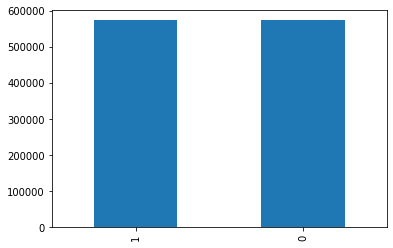

In [ ]:
data_1_resampled = resample(data_1,replace=True,n_samples=len(data_0), random_state = 42)
data = pd.concat([data_0,data_1_resampled])
print("Class compostion after resampling:")
print(data['target'].value_counts())
data['target'].value_counts().plot.bar();

After resampling the data has been distributed equaly fr the target column feature.

In [ ]:
#12. In total, how many features have missing values?
print("Total missing values in Total train data  is:\n",data.isnull().sum()) # to get the sum of null values present in each column

Total missing values in Total train data  is:
 id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09   

There are no missing or null values in the given data set.

**#11.Which are the top two features in terms of missing values?**

since there are no omissing values in the data there are no top features to get from them.

**#13.What steps should be taken to handle the missing data?**

As there are no null data in the given data so no need to do any analysis.
If the null data is present then there are many ways to handle them such as
- replacing them with the mean/mode/median of the column data.
- removing the particular rows in the data having the misssing values if there are in less number & data is huge.
and many other approaches based on experience & requirement.

**#14.Which interval variables have strong correlation?**

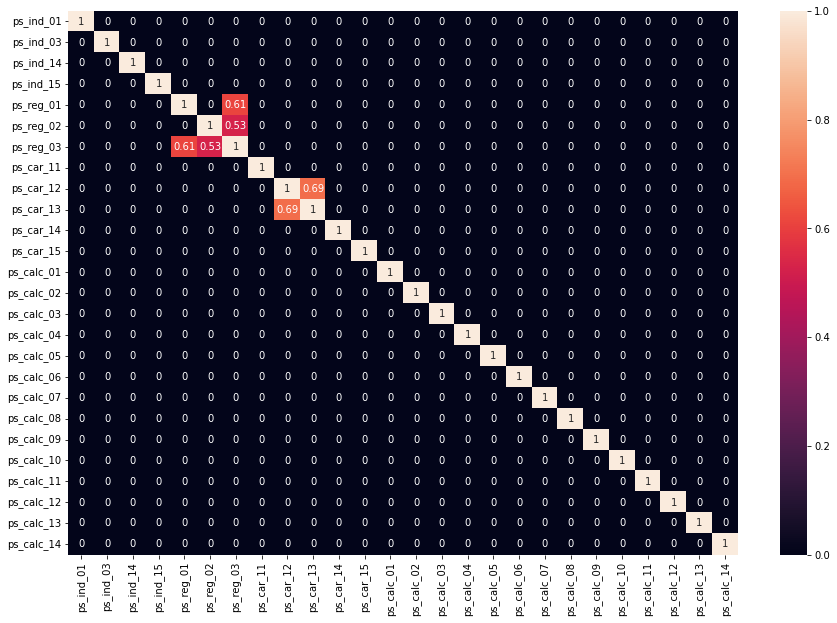

In [ ]:
#to get the correlation matrix
int_var_cor= data[interval_feature].corr()
int_var_cor = int_var_cor[(int_var_cor>=0.5) | (int_var_cor<=-0.5)].fillna(0)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(int_var_cor,annot= True)
plt.show()

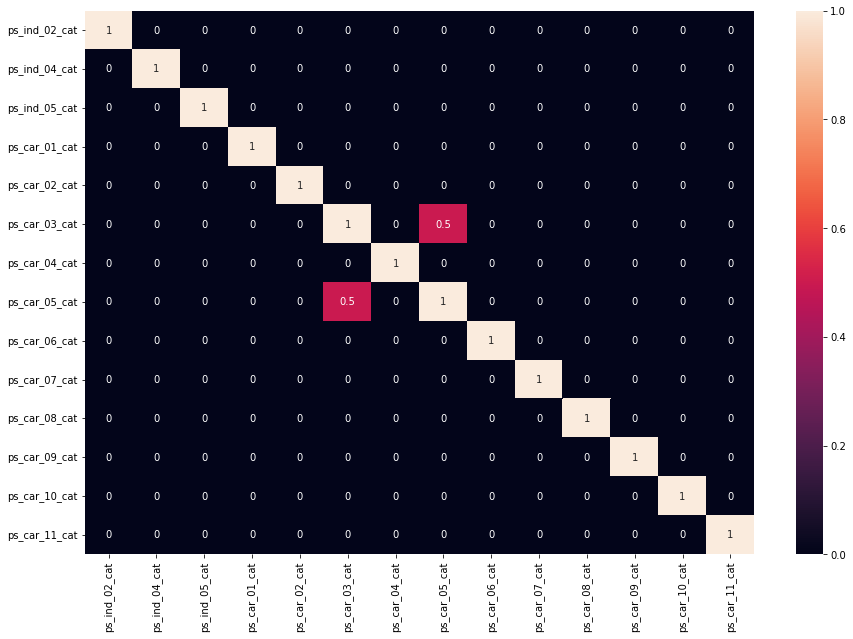

In [ ]:
#15.What's the level of correlation among ordinal features?
#In ordinal encoding, each unique category value is assigned an integer value.
# cutoff = 0.4
ordi_cor= data[categorical_feature].corr()
ordi_cor = ordi_cor[(ordi_cor>=0.4) | (ordi_cor<=-0.4)].fillna(0)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(ordi_cor,annot= True)
plt.show()

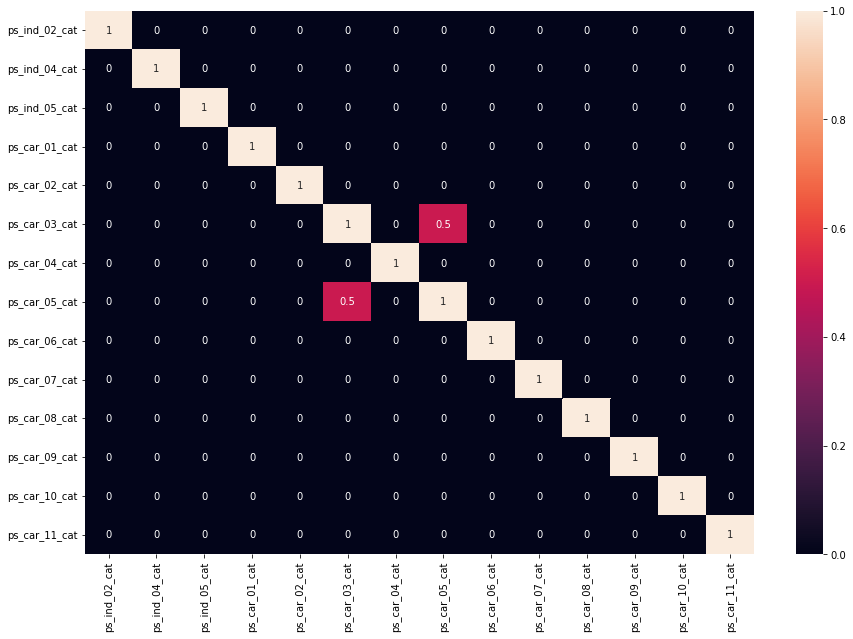

In [ ]:
# cutoff = 0.3
ordi_cor= data[categorical_feature].corr()
ordi_cor = ordi_cor[(ordi_cor>=0.3) | (ordi_cor<=-0.3)].fillna(0)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(ordi_cor,annot= True)
plt.show()

**correlation matrix**

1)The correlation matrix is a square matrix which represents the correlation coefficient between two variables.

2)all the diagonal elements are equal to 1, since they represent the correlation of variable with itself.

3)if correlation value is closer to

i) 0: then no/absecne of relation between two variables

ii) 1:strong positive correlation(one varaiable increases other increases)

iii)-1:strong negative correlation(if any one varaiable increases other decreases)

4) the darker shades of colour indicates smaller value and the lighter shades indicates the larger/highest value.

**#16.Implement Hot Encoding for categorical features**



1.   to convert to the catergorical data to 0 & 1.


2.   Since in the given data there is no categorical features so ne need to apply the hot encoding


*   If there is categorical features then we can use the following ways to convert them to numerical data.


from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data["col_name"]=le.fit_transform(data["col_name"])


or

from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()

data["col_name"]=ohe.fit_transform(data["col_name"])

or

one_hot_encoded_data = pd.get_dummies(data, columns = ["col_1","col_2"])

print(one_hot_encoded_data)

**#17.In nominal and interval features, which features are suitable for StandardScaler?**

standered scalar removes the mean and scales each features to unit varience.

the nominaldata is labelled or named data which can be divided into various groups which do not overlap.

nomminal are not suitable for the standard scaler so apply standered scalar for the interval features.


**#18.Summarize the learnings of ED(Explorataory Data)**

Given the data is imbalnced data and balancing must be done.
The correlation of various is not done properly.


**Modeling :**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score,mean_squared_error, precision_score, recall_score, classification_report
import math
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [ ]:
from numpy import argmax
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

**we can aso get the tn, fp, fn, tp values like this as well**.


"""
tn, fp, fn, tp = confusion_matrix(test['buy'], preds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

or

print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]

"""

In [ ]:
#1.The Simple Logistic Regression Model seems to have high accuracy. Is that what we need at all? What is the problem with this model?
x= train.drop(['target','id'], axis=1)
y= train['target']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=33)

lr= LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
#accuracy_result(y_test,y_pred)
confusion_matrix=metrics.confusion_matrix(y_test, y_pred)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('Recall score : ', round(metrics.recall_score(y_test, y_pred), 3))
print('Precision score:' ,round(metrics.precision_score(y_test,y_pred), 3))
print('Accuracyscore: ', np.round(metrics.accuracy_score(y_test, y_pred),3))
print('ROC AUC Score: ', np.round(roc_auc_score(y_test, y_pred),3))
print('F1 score: ', np.round(f1_score(y_test, y_pred),3))
print('\n CLASSIFICATION REPORT: \n',classification_report(y_test,y_pred))


 CONFUSION MATRIX:
  [[114738      0]
 [  4305      0]] 

Recall score :  0.0
Precision score: 0.0
Accuracyscore:  0.964
ROC AUC Score:  0.5
F1 score:  0.0

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    114738
           1       0.00      0.00      0.00      4305

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



the data is higly imbalanced.


**#2. Why do you think f1-score is 0.0?**

**f1 score** 
It is the measaure of accuracy.
It is the weighted average of precision & recall (The F1 score is defined as the harmonic mean of precision and recall).
the f1 score is between 0 & 1.
If f1 score is 0=worst & 1= best model.
f1=(2TP)/(2TP+FP+FN)

**Precision:** 
The +ve predicted values(no. of +ve class predicted that actually belon to a +ve class).
it is a quality measure.
Precision=TP/(TP+FP)

**Recall:**
It represent the sensitivity(no. of +ve predicted class to all the observations in actual class.
It is the quantity measure.
Recall=TP/(TP+FN)

**Accuracy:**
It is the measures the number of predictions that are correct as a percentage of the total number of predictions that are made.
Accuracy=(TP+TN)/(TP+FN+FP+TN)







**#3. What is the precision and recall score for the model?**
Recall score :  0.0
Precision score: 0.0

In [ ]:
X= data.drop(['target','id'], axis=1)
Y= data['target']
from sklearn.model_selection import train_test_split 
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y, test_size = 0.3,random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_Train)
X_Train = scaler.transform(X_Train)
X_Test = scaler.transform(X_Test)

In [ ]:
lr = LogisticRegression()
lr.fit(X_Train, Y_Train)

y_pred_train = lr.predict(X_Train)
y_pred_logreg2 =lr.predict(X_Test)

## 3. Using function for evaluating the model output

#accuracy_result(Y_Test, y_pred_logreg2)
confusion_matrix=metrics.confusion_matrix(Y_Test, y_pred_logreg2)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('Recall score : ', round(metrics.recall_score(Y_Test, y_pred_logreg2), 3))
print('Precision score:' ,round(metrics.precision_score(Y_Test, y_pred_logreg2), 3))
print('Accuracyscore: ', np.round(metrics.accuracy_score(Y_Test, y_pred_logreg2),3))
print('ROC AUC Score: ', np.round(roc_auc_score(Y_Test, y_pred_logreg2),3))
print('F1 score: ', np.round(f1_score(Y_Test, y_pred_logreg2),3))
print('\n CLASSIFICATION REPORT: \n',classification_report(Y_Test, y_pred_logreg2))


 CONFUSION MATRIX:
  [[108037  64256]
 [ 77249  94569]] 

Recall score :  0.55
Precision score: 0.595
Accuracyscore:  0.589
ROC AUC Score:  0.589
F1 score:  0.572

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.58      0.63      0.60    172293
           1       0.60      0.55      0.57    171818

    accuracy                           0.59    344111
   macro avg       0.59      0.59      0.59    344111
weighted avg       0.59      0.59      0.59    344111



**#4. What is the most important inference you can draw from the result?**
**Before resampling**

Recall score :  0.0
Precision score: 0.0
Accuracyscore:  0.964
ROC AUC Score:  0.5
F1 score:  0.0

**#After resampling**

Recall score :  0.55
Precision score: 0.595
Accuracyscore:  0.589
ROC AUC Score:  0.589
F1 score:  0.572

The accuracy score has been reduced and f1 score, Recall, Precision has been increased.

**#5. What is the accuracy score and f1-score for the improved Logistic Regression model?**

F1 score:  0  -before resampling

F1 score:  0.572  -after resampling

**#6. Why do you think f1-score has improved?**

f1=(2TP)/(2TP+FP+FN)
since the f1 score is dependent o the TP, FP, FN since the values has been increased after resamplin the f1 score was imporoved. 

**#7. For model LinearSVC play with parameters – dual, max_iter and see if there is any improvement**

In [ ]:
from sklearn.svm import LinearSVC
lsvc=LinearSVC()
lsvc.fit(X_Train, Y_Train)
Y_pred = lsvc.predict(X_Test)
confusion_matrix=metrics.confusion_matrix(Y_Test,Y_pred)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('Recall score : ', round(metrics.recall_score(Y_Test,Y_pred), 3))
print('Precision score:' ,round(metrics.precision_score(Y_Test,Y_pred), 3))
print('Accuracyscore: ', np.round(metrics.accuracy_score(Y_Test,Y_pred),3))
print('ROC AUC Score: ', np.round(roc_auc_score(Y_Test,Y_pred),3))
print('F1 score: ', np.round(f1_score(Y_Test,Y_pred),3))
print('\n CLASSIFICATION REPORT: \n',classification_report(Y_Test,Y_pred))


 CONFUSION MATRIX:
  [[108305  63988]
 [ 77743  94075]] 

Recall score :  0.548
Precision score: 0.595
Accuracyscore:  0.588
ROC AUC Score:  0.588
F1 score:  0.57

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.58      0.63      0.60    172293
           1       0.60      0.55      0.57    171818

    accuracy                           0.59    344111
   macro avg       0.59      0.59      0.59    344111
weighted avg       0.59      0.59      0.59    344111



In [ ]:
from sklearn.svm import LinearSVC
lsvc=LinearSVC(dual=True, max_iter=500)
lsvc.fit(X_Train, Y_Train)
Y_pred = lsvc.predict(X_Test)
confusion_matrix=metrics.confusion_matrix(Y_Test,Y_pred)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('Recall score : ', round(metrics.recall_score(Y_Test,Y_pred), 3))
print('Precision score:' ,round(metrics.precision_score(Y_Test,Y_pred), 3))
print('Accuracyscore: ', np.round(metrics.accuracy_score(Y_Test,Y_pred),3))
print('ROC AUC Score: ', np.round(roc_auc_score(Y_Test,Y_pred),3))
print('F1 score: ', np.round(f1_score(Y_Test,Y_pred),3))
print('\n CLASSIFICATION REPORT: \n',classification_report(Y_Test,Y_pred))


 CONFUSION MATRIX:
  [[108366  63927]
 [ 77952  93866]] 

Recall score :  0.546
Precision score: 0.595
Accuracyscore:  0.588
ROC AUC Score:  0.588
F1 score:  0.57

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.58      0.63      0.60    172293
           1       0.59      0.55      0.57    171818

    accuracy                           0.59    344111
   macro avg       0.59      0.59      0.59    344111
weighted avg       0.59      0.59      0.59    344111



with the dual & max_iter the recal score was reduced(from 0.548 to 0.546) very slightly, except that no much improvement in other values.

**#8. SVC with Imbalance Check & Feature Optimization & only 100K Records → is there improvement in scores?**

In [ ]:
#SVC
from sklearn import svm
x_=X_Train[:10000,:]
y_=Y_Train[:10000]

clf = svm.SVC(kernel='linear')
clf.fit(x_, y_)
# y_pred_train = clf.predict(X_train)
Y_pred_svc= clf.predict(X_Test)
confusion_matrix=metrics.confusion_matrix(Y_Test, Y_pred_svc)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('Recall score : ', round(metrics.recall_score(Y_Test, Y_pred_svc), 3))
print('Precision score:' ,round(metrics.precision_score(Y_Test, Y_pred_svc), 3))
print('Accuracyscore: ', np.round(metrics.accuracy_score(Y_Test, Y_pred_svc),3))
print('ROC AUC Score: ', np.round(roc_auc_score(Y_Test, Y_pred_svc),3))
print('F1 score: ', np.round(f1_score(Y_Test, Y_pred_svc),3))
print('\n CLASSIFICATION REPORT: \n',classification_report(Y_Test, Y_pred_svc))


 CONFUSION MATRIX:
  [[113142  59151]
 [ 83723  88095]] 

Recall score :  0.513
Precision score: 0.598
Accuracyscore:  0.585
ROC AUC Score:  0.585
F1 score:  0.552

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.57      0.66      0.61    172293
           1       0.60      0.51      0.55    171818

    accuracy                           0.58    344111
   macro avg       0.59      0.58      0.58    344111
weighted avg       0.59      0.58      0.58    344111



In [ ]:
#9. XGBoost is one the better classifiers -- but still f1-score is very low. What could be the reason?
#XGBoost (Extreme Gradient Boosting) 
import xgboost
from xgboost import XGBClassifier
xgbc=XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 10, alpha = 10, n_estimators = 100)
xgbc.fit(X_Train, Y_Train)
Y_pred_xgbc= xgbc.predict(X_Test)
confusion_matrix=metrics.confusion_matrix(Y_Test, Y_pred_xgbc)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('Recall score : ', round(metrics.recall_score(Y_Test, Y_pred_xgbc), 3))
print('Precision score:' ,round(metrics.precision_score(Y_Test, Y_pred_xgbc), 3))
print('Accuracyscore: ', np.round(metrics.accuracy_score(Y_Test, Y_pred_xgbc),3))
print('ROC AUC Score: ', np.round(roc_auc_score(Y_Test, Y_pred_xgbc),3))
print('F1 score: ', np.round(f1_score(Y_Test, Y_pred_xgbc),3))
print('\n CLASSIFICATION REPORT: \n',classification_report(Y_Test, Y_pred_xgbc))


 CONFUSION MATRIX:
  [[145553  26740]
 [ 30344 141474]] 

Recall score :  0.823
Precision score: 0.841
Accuracyscore:  0.834
ROC AUC Score:  0.834
F1 score:  0.832

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84    172293
           1       0.84      0.82      0.83    171818

    accuracy                           0.83    344111
   macro avg       0.83      0.83      0.83    344111
weighted avg       0.83      0.83      0.83    344111



**#10. What is the increase in number of features after one-hot encoding of the data?**

**#11. Is there any improvement in scores after encoding?**


1.   to convert to the catergorical data to 0 & 1.


2.   Since in the given data there is no categorical features so ne need to apply the hot encoding


*   If there is categorical features then we can use the following ways to convert them to numerical data.


*   since encoding was not done so any improvevment in the score cant be defined.



**#12. If not missing a positive sample is the priority which model is best so far?**

 In the above the xgboost is the best becaude it has the highest f1 score of 0.832. if f1 score is nearer to 1 hen it is the best model.
 
  the missing positive values for this confusion matrix is less compared to other models.

**#13. If not marking negative sample as positive is top priority, which model is best so far?**


 In the above the xgboost is the best becaude it has the highest f1 score of 0.832. if f1 score is nearer to 1 hen it is the best model.
 
the missing negative values for this confusion matrix is less compared to other models.



In [ ]:
#14. Do you think using AdaBoost can give any significant improvement over XGBoost?
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
abc.fit(X_Train, Y_Train)
Y_pred_abc= abc.predict(X_Test)
confusion_matrix=metrics.confusion_matrix(Y_Test, Y_pred_abc)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('Recall score : ', round(metrics.recall_score(Y_Test, Y_pred_abc), 3))
print('Precision score:' ,round(metrics.precision_score(Y_Test, Y_pred_abc), 3))
print('Accuracyscore: ', np.round(metrics.accuracy_score(Y_Test, Y_pred_abc),3))
print('ROC AUC Score: ', np.round(roc_auc_score(Y_Test, Y_pred_abc),3))
print('F1 score: ', np.round(f1_score(Y_Test, Y_pred_abc),3))
print('\n CLASSIFICATION REPORT: \n',classification_report(Y_Test, Y_pred_abc))



 CONFUSION MATRIX:
  [[106422  65871]
 [ 72806  99012]] 

Recall score :  0.576
Precision score: 0.6
Accuracyscore:  0.597
ROC AUC Score:  0.597
F1 score:  0.588

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.59      0.62      0.61    172293
           1       0.60      0.58      0.59    171818

    accuracy                           0.60    344111
   macro avg       0.60      0.60      0.60    344111
weighted avg       0.60      0.60      0.60    344111



xgboost is the best than the adaboost due to the highest f1 score

In [ ]:
#15.MLPClassifier is the neural network we are trying. But how to choose the right no. of layers  and size?
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10),activation='logistic', max_iter=200)
mlp.fit(X_Train, Y_Train.values.ravel())
Y_pred_mlp= abc.predict(X_Test)
confusion_matrix=metrics.confusion_matrix(Y_Test, Y_pred_mlp)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('Recall score : ', round(metrics.recall_score(Y_Test, Y_pred_mlp), 3))
print('Precision score:' ,round(metrics.precision_score(Y_Test, Y_pred_mlp), 3))
print('Accuracyscore: ', np.round(metrics.accuracy_score(Y_Test, Y_pred_mlp),3))
print('ROC AUC Score: ', np.round(roc_auc_score(Y_Test, Y_pred_mlp),3))
print('F1 score: ', np.round(f1_score(Y_Test, Y_pred_mlp),3))
print('\n CLASSIFICATION REPORT: \n',classification_report(Y_Test, Y_pred_mlp))


 CONFUSION MATRIX:
  [[106422  65871]
 [ 72806  99012]] 

Recall score :  0.576
Precision score: 0.6
Accuracyscore:  0.597
ROC AUC Score:  0.597
F1 score:  0.588

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.59      0.62      0.61    172293
           1       0.60      0.58      0.59    171818

    accuracy                           0.60    344111
   macro avg       0.60      0.60      0.60    344111
weighted avg       0.60      0.60      0.60    344111



In [ ]:
#16.At what layer size we get the best f1-score?
print("Logistic Regression scores:")
print('Accuracyscore: ', np.round(metrics.accuracy_score(Y_Test, y_pred_logreg2),3))
print('F1 score: ', np.round(f1_score(Y_Test, y_pred_logreg2),3))

print("\n AdaBoostCassifier scores:")
print('Accuracyscore: ', np.round(metrics.accuracy_score(Y_Test, Y_pred_abc),3))
print('F1 score: ', np.round(f1_score(Y_Test, Y_pred_abc),3))

print("\n XGBClassifier scores")
print('Accuracyscore: ', np.round(metrics.accuracy_score(Y_Test, Y_pred_xgbc),3))
print('F1 score: ', np.round(f1_score(Y_Test, Y_pred_xgbc),3))

print("\n LinearSVC")
print('Accuracyscore: ', np.round(metrics.accuracy_score(Y_Test,Y_pred),3))
print('F1 score: ', np.round(f1_score(Y_Test,Y_pred),3))

print("\n MLPClassifier scores")
print('Accuracyscore: ', np.round(metrics.accuracy_score(Y_Test, Y_pred_mlp),3))
print('F1 score: ', np.round(f1_score(Y_Test, Y_pred_mlp),3))

Logistic Regression scores:
Accuracyscore:  0.589
F1 score:  0.572

 AdaBoostCassifier scores:
Accuracyscore:  0.597
F1 score:  0.588

 XGBClassifier scores
Accuracyscore:  0.834
F1 score:  0.832

 LinearSVC
Accuracyscore:  0.588
F1 score:  0.57

 MLPClassifier scores
Accuracyscore:  0.597
F1 score:  0.588


After comparing the results the XGBClassifier is the best out of all.